# 赛事背景

房屋租赁市场是房地产市场的重要组成部分。中国城市化进程的加剧，导致一二线城市房价不断攀升，越来越多的人选择以房屋租赁的方式来满足住房的需求。价格是反映一定时期内房屋租赁价格水平变动趋势和变动程度，分析预测房屋租赁价格，对于发展完善房屋租赁市场有着重要的意义。

据统计，中国有近2亿租房人口，租户偏好千变万化，房源种类各不相同。如何高效且合理的解决房屋价值预估，成为各大平台关注的问题。某租房平台将部分房屋信息数据开放，诚邀大家帮助他们建立价格预测模型来预测房屋租赁价格（敏感信息已脱敏）。

## 赛事任务

给定某租房平台实际业务中的相关租房信息，包含31个与房屋相关的字段，其中“房屋租金”字段为房屋信息的真实基本租金，即不包含服务费、电费、水费和燃气费等。任务目标是通过训练集训练模型，来预测测试集中“房屋租金”字段的具体值，以此为依据，提高房屋价值预估准确率。

## 数据说明

赛题数据由训练集和测试集组成，总数据量超过30w，包含31个特征字段。为了保证比赛的公平性，将会从中抽取20万条作为训练集，5万条作为测试集，同时会对部分字段信息进行脱敏。

```
ID、区域1、区域2、区域3、街道、上传日期、服务费、供暖费用、电力基础价格、有阳台、没有停车位、有厨房、有地窖、居住面积、房屋状况、内饰质量、可带宠物、加热类型、有电梯、房屋类型、邮政编码、房间数量、所处楼层、建筑楼层、有花园、最后翻新年份、是新建筑、建成年份、价格趋势、上传图片、房屋租金
```

# 数据读取

In [1]:
import pandas as pd
import seaborn as sns

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df.head()

,ID,区域1,区域2,区域3,街道,上传日期,房屋租金,服务费,供暖费用,电力基础价格,...,邮政编码,房间数量,所处楼层,建筑楼层,有花园,最后翻新年份,是新建筑,建成年份,价格趋势,上传图片数
0,0,0,0,0,0,Oct19,569.0,140.0,NaN,NaN,...,0,3.0,2.0,3.0,False,NaN,False,1971.0,4.62,6
1,1,1,1,1,1,Oct19,560.0,120.0,NaN,NaN,...,1,2.0,NaN,NaN,False,NaN,False,1967.0,5.95,7
2,2,0,2,2,2,Feb20,720.0,NaN,NaN,NaN,...,2,1.0,1.0,1.0,False,NaN,False,2018.0,3.83,10
3,3,2,3,3,3,May19,695.0,153.0,NaN,NaN,...,3,2.0,2.0,3.0,False,NaN,False,1972.0,5.24,7
4,4,3,4,4,1,Oct19,1200.0,350.0,NaN,NaN,...,4,4.5,2.0,2.0,True,NaN,False,NaN,5.63,14


# 数据分析

## 房屋租金

In [4]:
train_df['房屋租金'].max()

9999999.0

In [5]:
train_df[train_df['房屋租金'] > train_df['房屋租金'].quantile(0.999)].head(1)

,ID,区域1,区域2,区域3,街道,上传日期,房屋租金,服务费,供暖费用,电力基础价格,...,邮政编码,房间数量,所处楼层,建筑楼层,有花园,最后翻新年份,是新建筑,建成年份,价格趋势,上传图片数
1575,1575,9,16,268,1,Feb20,5500.0,500.0,NaN,NaN,...,947,4.0,NaN,2.0,False,NaN,False,NaN,4.58,13


## 缺失值分析

In [6]:
train_df.isnull().mean(0)

ID        0.000000
区域1       0.000000
区域2       0.000000
区域3       0.000000
街道        0.000000
上传日期      0.000000
房屋租金      0.000000
服务费       0.025610
供暖费用      0.682465
电力基础价格    0.825970
有阳台       0.000000
没有停车位     0.654085
有厨房       0.000000
有地窖       0.000000
居住面积      0.000000
房屋状况      0.000015
内饰质量      0.007260
可带宠物      0.426480
加热类型      0.000595
有电梯       0.000000
房屋类型      0.021005
邮政编码      0.000000
房间数量      0.000000
所处楼层      0.191320
建筑楼层      0.363355
有花园       0.000000
最后翻新年份    0.699170
是新建筑      0.000000
建成年份      0.212390
价格趋势      0.006605
上传图片数     0.000000
dtype: float64

## 相关性分析

In [7]:
train_df.corr()['房屋租金']

ID       -0.000530
区域1      -0.002137
区域2       0.002115
区域3       0.003195
街道        0.002761
房屋租金      1.000000
服务费       0.627498
供暖费用      0.114817
电力基础价格    0.003633
有阳台       0.002828
没有停车位     0.004404
有厨房       0.004713
有地窖      -0.002857
居住面积      0.013557
房屋状况     -0.001372
内饰质量     -0.001297
加热类型      0.001421
有电梯       0.005293
房屋类型      0.000681
邮政编码      0.009896
房间数量      0.003324
所处楼层      0.011161
建筑楼层      0.008226
有花园      -0.000480
最后翻新年份    0.153241
是新建筑      0.005062
建成年份      0.143588
价格趋势      0.010815
上传图片数     0.003238
Name: 房屋租金, dtype: float64

## 探索性分析

<AxesSubplot:xlabel='区域1'>

/home/lyz/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 21306 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/lyz/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 22495 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/lyz/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 21306 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/lyz/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 22495 missing from current font.
  font.set_text(s, 0, flags=flags)


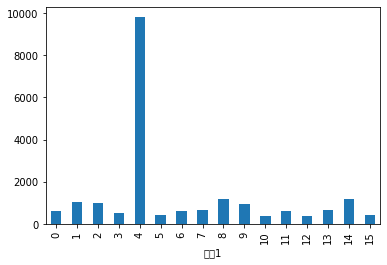

In [8]:
train_df.groupby(['区域1'])['房屋租金'].mean().plot(kind='bar')

In [9]:
train_df.groupby(['有花园'])['房屋租金'].mean()

有花园
False    710.410061
True     683.139171
Name: 房屋租金, dtype: float64

# 特征编码

In [10]:
train_df.dtypes

ID          int64
区域1         int64
区域2         int64
区域3         int64
街道          int64
上传日期       object
房屋租金      float64
服务费       float64
供暖费用      float64
电力基础价格    float64
有阳台          bool
没有停车位     float64
有厨房          bool
有地窖          bool
居住面积      float64
房屋状况      float64
内饰质量      float64
可带宠物       object
加热类型      float64
有电梯          bool
房屋类型      float64
邮政编码        int64
房间数量      float64
所处楼层      float64
建筑楼层      float64
有花园          bool
最后翻新年份    float64
是新建筑         bool
建成年份      float64
价格趋势      float64
上传图片数       int64
dtype: object

In [11]:
train_df['上传日期_day'] = train_df['上传日期'].apply(lambda x: int(x[-2:]))
test_df['上传日期_day'] = test_df['上传日期'].apply(lambda x: int(x[-2:]))

In [12]:
train_df['上传日期_month'] = train_df['上传日期'].apply(lambda x: x[:2])
test_df['上传日期_month'] = test_df['上传日期'].apply(lambda x: x[:2])

train_df['上传日期_month'] = train_df['上传日期_month'].apply(lambda x: ['Fe', 'Ma', 'Oc', 'Se'].index(x))
test_df['上传日期_month'] = test_df['上传日期_month'].apply(lambda x: ['Fe', 'Ma', 'Oc', 'Se'].index(x))

train_df.drop(['上传日期'], axis=1, inplace=True)
test_df.drop(['上传日期'], axis=1, inplace=True)

In [13]:
train_df['可带宠物'] = train_df['可带宠物'].map({'negotiable': 0.5, 'no': 0, 'yea': 1})
test_df['可带宠物'] = test_df['可带宠物'].map({'negotiable': 0.5, 'no': 0, 'yea': 1})

In [14]:
for col in train_df.select_dtypes(bool).columns:
    train_df[col] = train_df[col].astype(int)
    test_df[col] = test_df[col].astype(int)

In [15]:
train_df.dtypes

ID              int64
区域1             int64
区域2             int64
区域3             int64
街道              int64
房屋租金          float64
服务费           float64
供暖费用          float64
电力基础价格        float64
有阳台             int64
没有停车位         float64
有厨房             int64
有地窖             int64
居住面积          float64
房屋状况          float64
内饰质量          float64
可带宠物          float64
加热类型          float64
有电梯             int64
房屋类型          float64
邮政编码            int64
房间数量          float64
所处楼层          float64
建筑楼层          float64
有花园             int64
最后翻新年份        float64
是新建筑            int64
建成年份          float64
价格趋势          float64
上传图片数           int64
上传日期_day        int64
上传日期_month      int64
dtype: object

In [16]:
train_df['房屋租金'] = np.log1p(train_df['房屋租金'])

In [17]:
train_df['区域1_租金价格'] = train_df['区域1'].map(train_df.groupby(['区域1'])['房屋租金'].mean())
test_df['区域1_租金价格'] = test_df['区域1'].map(train_df.groupby(['区域1'])['房屋租金'].mean())

train_df['区域2_租金价格'] = train_df['区域2'].map(train_df.groupby(['区域2'])['房屋租金'].mean())
test_df['区域2_租金价格'] = test_df['区域2'].map(train_df.groupby(['区域2'])['房屋租金'].mean())

train_df['邮政编码_租金价格'] = train_df['邮政编码'].map(train_df.groupby(['邮政编码'])['房屋租金'].mean())
test_df['邮政编码_租金价格'] = test_df['邮政编码'].map(train_df.groupby(['邮政编码'])['房屋租金'].mean())

In [18]:
train_df['所处楼层_div'] = train_df['所处楼层'] / train_df['建筑楼层']
test_df['所处楼层_div'] = test_df['所处楼层'] / test_df['建筑楼层']

train_df['所处楼层_max'] = (train_df['所处楼层'] == train_df['建筑楼层']).astype(int)
test_df['所处楼层_max'] = (test_df['所处楼层'] == test_df['建筑楼层']).astype(int)

train_df['居住面积_mean'] = train_df['居住面积'] / train_df['房间数量']
test_df['居住面积_mean'] = test_df['居住面积'] / test_df['房间数量']


In [20]:
train_df['建成年龄'] = 2022 - train_df['建成年份']
test_df['建成年龄'] = 2022 - test_df['建成年份']

train_df['翻新年龄'] = 2022 - train_df['最后翻新年份']
test_df['翻新年龄'] = 2022 - test_df['最后翻新年份']

# 搭建模型

In [21]:
for col in ['区域1', '区域2', '区域3', '街道', '房屋类型', '房屋状况', '可带宠物', '邮政编码']:
    train_df[col] = train_df[col].astype('category')
    test_df[col] = test_df[col].astype('category')

In [22]:
# 模型交叉验证
def run_model_cv(model, kf, X_tr, y, X_te, cate_col=None):
    train_pred = np.zeros( len(X_tr) )
    test_pred = np.zeros( len(X_te)  )

    cv_clf = []
    for tr_idx, val_idx in kf.split(X_tr, y):
        x_tr = X_tr.iloc[tr_idx]; y_tr = y.iloc[tr_idx]

        x_val = X_tr.iloc[val_idx]; y_val = y.iloc[val_idx]

        call_back = [
            lgb.early_stopping(50),
        ]
        eval_set = [(x_val, y_val)]
        model.fit(x_tr, y_tr, eval_set=eval_set, callbacks=call_back, verbose=-1,
                 categorical_feature= 'auto', eval_metric= 'mae', )

        cv_clf.append(model)

        train_pred[val_idx] = model.predict(x_val)
        test_pred += model.predict(X_te)

    test_pred /= kf.n_splits
    
    print(np.abs(np.exp(train_pred) - np.exp(y)).mean())
    return train_pred, test_pred, cv_clf

In [31]:
from sklearn.model_selection import KFold
import lightgbm as lgb

test_pred_tta = np.zeros( len(test_df)  )
for _ in range(1):
    clf = lgb.LGBMRegressor(
        max_depth=7, 
        n_estimators=4000, 
        n_jobs=-1, 
        verbose=-1,
        verbosity=-1,
        learning_rate=0.03,
        random_state=np.random.randint(100)
    )

    train_pred, test_pred, cv_clf = run_model_cv(
        clf, KFold(n_splits=5, random_state=np.random.randint(100), shuffle=True),
        train_df.drop(['ID', '房屋租金'], axis=1),
        train_df['房屋租金'],
        test_df.drop(['ID'], axis=1),
    )
    
    test_pred_tta += test_pred

# 133.28688613802427，95.7
# 132.1 75.0

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[1623]	valid_0's l1: 0.111033	valid_0's l2: 0.0370112
[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[1009]	valid_0's l1: 0.112559	valid_0's l2: 0.0394435
[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[1981]	valid_0's l1: 0.111733	valid_0's l2: 0.0417785
[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity

In [32]:
pd.DataFrame({
    'ID': test_df['ID'],
    '房屋租金': np.exp(test_pred_tta / 1).astype(int)
}).to_csv('submit.csv', index=None)